In [47]:
import pandas as pd

# Load the data
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# Merge on 'uid', keeping all rows from train_labels
data = pd.merge(train_features, train_labels, on='uid', how='right')

# Set 'uid' as index and sort for alignment
data.set_index('uid', inplace=True)
data.sort_index(inplace=True)
X = data.drop(columns=['composite_score'])


In [48]:

# List of columns to check
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]
for col in columns_to_check:


    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    # Get unique values for each column
    unique_03 = X[col_03].unique()
    unique_12 = X[col_12].unique()
    
    # Filter out nan values for comparison
    unique_03_no_nan = [val for val in unique_03 if pd.notna(val)]
    unique_12_no_nan = [val for val in unique_12 if pd.notna(val)]
    
    # Sort the filtered arrays
    unique_03_sorted = sorted(unique_03_no_nan)
    unique_12_sorted = sorted(unique_12_no_nan)
    

    
    # Compare sorted arrays and check if they are equal
    are_equal = unique_03_sorted == unique_12_sorted
    #print(f'{are_equal}')
    if are_equal == False:
        print(col)
        print(f'{col_03} - {unique_03}')
        print(f'{col_12} - {unique_12}')

    


n_mar
n_mar_03 - [nan  1.  2.  3.  0.  4.  5.]
n_mar_12 - [ 1.  2.  3.  4. nan  0.  5.  7.]
decis_personal
decis_personal_03 - [nan  1.  2.  3.]
decis_personal_12 - ['1. A lot' '2. A little' nan '3. None']
rjob_hrswk
rjob_hrswk_03 - [nan 30. 48. 35.  5. 72. 36. 42. 63. 45. 12.  6. 40. 55. 18. 57. 15. 60.
 84. 39. 16. 21. 70. 56. 50. 20. 66. 90. 49. 44. 47.  9. 25. 99.  4. 28.
 87. 64. 77. 52. 24. 54. 13. 46. 26. 14.  7. 10. 94. 23. 81.  3. 68. 58.
 71. 73. 76. 32. 38. 27. 91. 22.  8. 74. 79. 31. 80. 67. 62. 82. 65. 59.
 29. 88. 85.  1. 43. 78. 34. 17. 53. 33. 19.]
rjob_hrswk_12 - [ 66.  72.  nan  60.  35.  24.  42.  19.  36.  48.  45.  39.  56.  55.
   5.  84.  30.   9.  52.  28.   0.  14.  25.  54.  40.  49.  10.  16.
  20.  98.  44.  58.   4.  93.  21.  61.  12.   8.  70.  46.  15.  96.
  91.   3.  50.  18.   6.  65.  77.  67.  26.  38.  59.  47.  51.  64.
  43.  68.  29.  34.  33.  53.  37.  31. 111.  41.  94.  32.  23.  27.
  22.  73.  69.  11.  97. 109.  90.  71.  63.  57.  87.  8

In [49]:
decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}

# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in data.columns and col_12 in data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            data[new_col] = data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            data[new_col] = data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
print("Data preview after processing:")




Data preview after processing:


In [50]:
data.head()

,vax_flu_12,vax_pneu_12,seg_pop_12,care_adult_12,care_child_12,volunteer_12,attends_class_12,attends_club_12,reads_12,games_12,...,rearnings,searnings,hincome,hinc_business,hinc_rent,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp
uid,,,,,,,,,,,,,,,,,,,,,
aace,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,140000.0,10000.0,0.0,0.0,10000.0,0.0,0.0,2.somewhat important
aanz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,70000.0,0.0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.very important
aape,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.somewhat important
aape,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.somewhat important
aard,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.very important


In [51]:
kolom = data.columns
for i, total_null in enumerate(data.isnull().sum()):
    print(kolom[i], total_null)
    

vax_flu_12 266
vax_pneu_12 355
seg_pop_12 107
care_adult_12 255
care_child_12 257
volunteer_12 260
attends_class_12 256
attends_club_12 255
reads_12 267
games_12 259
table_games_12 258
comms_tel_comp_12 257
act_mant_12 255
tv_12 255
sewing_12 255
satis_ideal_12 331
satis_excel_12 289
satis_fine_12 266
cosas_imp_12 272
wouldnt_change_12 297
memory_12 291
ragender 0
rameduc_m 535
rafeduc_m 640
rrfcntx_m_12 268
rsocact_m_12 255
rrelgwk_12 257
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
j11_12 89
year 0
composite_score 0
age 2
urban 0
married 0
n_mar 31
edu_gru 15
n_living_child 9
migration 0
glob_hlth 79
adl_dress 79
adl_walk 3
adl_bath 11
adl_eat 4
adl_bed 3
adl_toilet 3
n_adl 11
iadl_money 79
iadl_meds 79
iadl_shop 79
iadl_meals 79
n_iadl 79
depressed 83
hard 81
restless 82
happy 79
lonely 80
enjoy 82
sad 79
tired 79
energetic 82
n_depr 88
cesd_depressed 88
hypertension 7
diabetes 5
resp_ill 3
arthritis 7
hrt_attack 4
stroke 3
cancer 8
n_illnesses 21
bmi 314
exer_3xwk 

In [80]:
df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier


In [53]:
X['rjobend_reason'].unique()

array([None, '4.Health reason', '8.Other', '5.Family reason',
       '3.Laid off', '1.Retired'], dtype=object)

In [54]:
X['decis_famil'].isnull().sum()

np.int64(1102)

Use common sense to choose feature

In [55]:
'''
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
j11_12 89
'''
df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier

col_to_drop = [
    'a16a_12', 'a21_12', 'a22_12', 'a33b_12',
    'a34_12', 'j11_12', 
    #maybe
    'rjob_end', 'rjobend_reason'
]
X.drop(columns=col_to_drop, inplace=True)

In [81]:
y = df['composite_score']

# Preprocess data

In [101]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Make sure X is a DataFrame
#X = pd.DataFrame(X)  # If X is not already a DataFrame, ensure it's one
'''
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
j11_12 89
'''
df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier

col_to_drop = [
    'a16a_12', 'a21_12', 'a22_12', 'a33b_12',
    'a34_12', 'j11_12', 
    #maybe
    'rjob_end', 'rjobend_reason'
]
X.drop(columns=col_to_drop, inplace=True)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    X[col] = X[col].apply(
    lambda x: str(x) if pd.notna(x) else x  # Convert non-NaN values to string, leave NaN as is
)


# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert numerical columns to float, invalid parsing will become NaN

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Fill missing numerical values with the median
    ('scaler', MinMaxScaler())  # Scale numerical features between 0 and 1
])



# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessing for y (target)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X)

# Apply MinMaxScaler to y
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to a 2D array for scaler
y_transformed = y_scaler.fit_transform(y_reshaped)

# Outputs
print("Transformed X (features):", X_transformed)
print("Transformed y (target):", y_transformed)


Transformed X (features): [[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
Transformed y (target): [[0.51818182]
 [0.61212121]
 [0.47575758]
 ...
 [0.35454545]
 [0.08484848]
 [0.43333333]]


# EDA

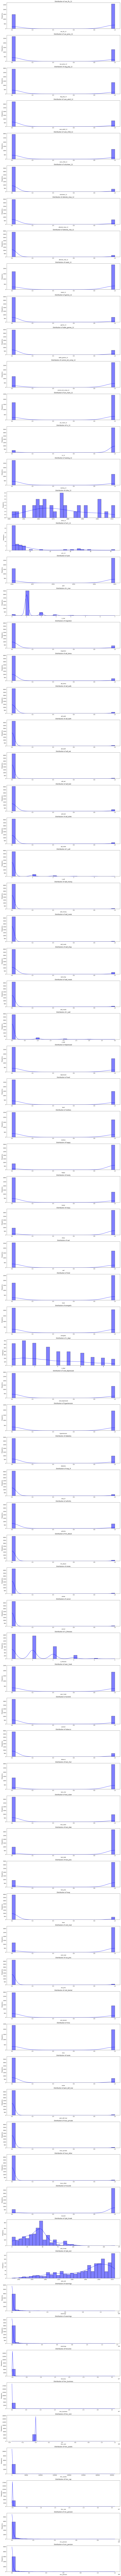

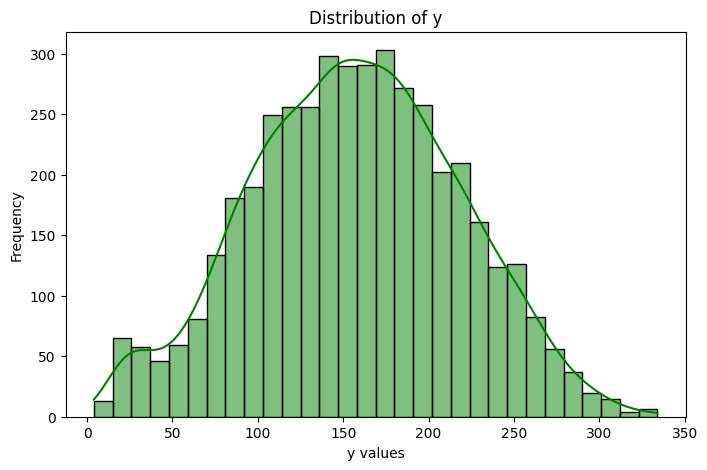

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of each numerical feature in X
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot distributions of numerical features in X
plt.figure(figsize=(15, len(numerical_features) * 4))
for i, col in enumerate(numerical_features, start=1):
    plt.subplot(len(numerical_features), 1, i)
    sns.histplot(X[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot the distribution of y
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='green')
plt.title("Distribution of y")
plt.xlabel("y values")
plt.ylabel("Frequency")
plt.show()


# Check correlation

Correlation Scores:
                          Feature  Correlation
142     cat__edu_gru_4. 10+ years     0.394360
8                   num__reads_12     0.330995
127             cat__age_1. 50–59     0.326291
141     cat__edu_gru_3. 7–9 years     0.298850
9                   num__games_12     0.292463
..                            ...          ...
102         cat__rafeduc_m_1.None    -0.265290
132        cat__urban_0. <100,000    -0.265877
148     cat__n_living_child_4. 7+    -0.297439
98          cat__rameduc_m_1.None    -0.332525
138  cat__edu_gru_0. No education    -0.426159

[201 rows x 2 columns]


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_33732\3329144088.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")


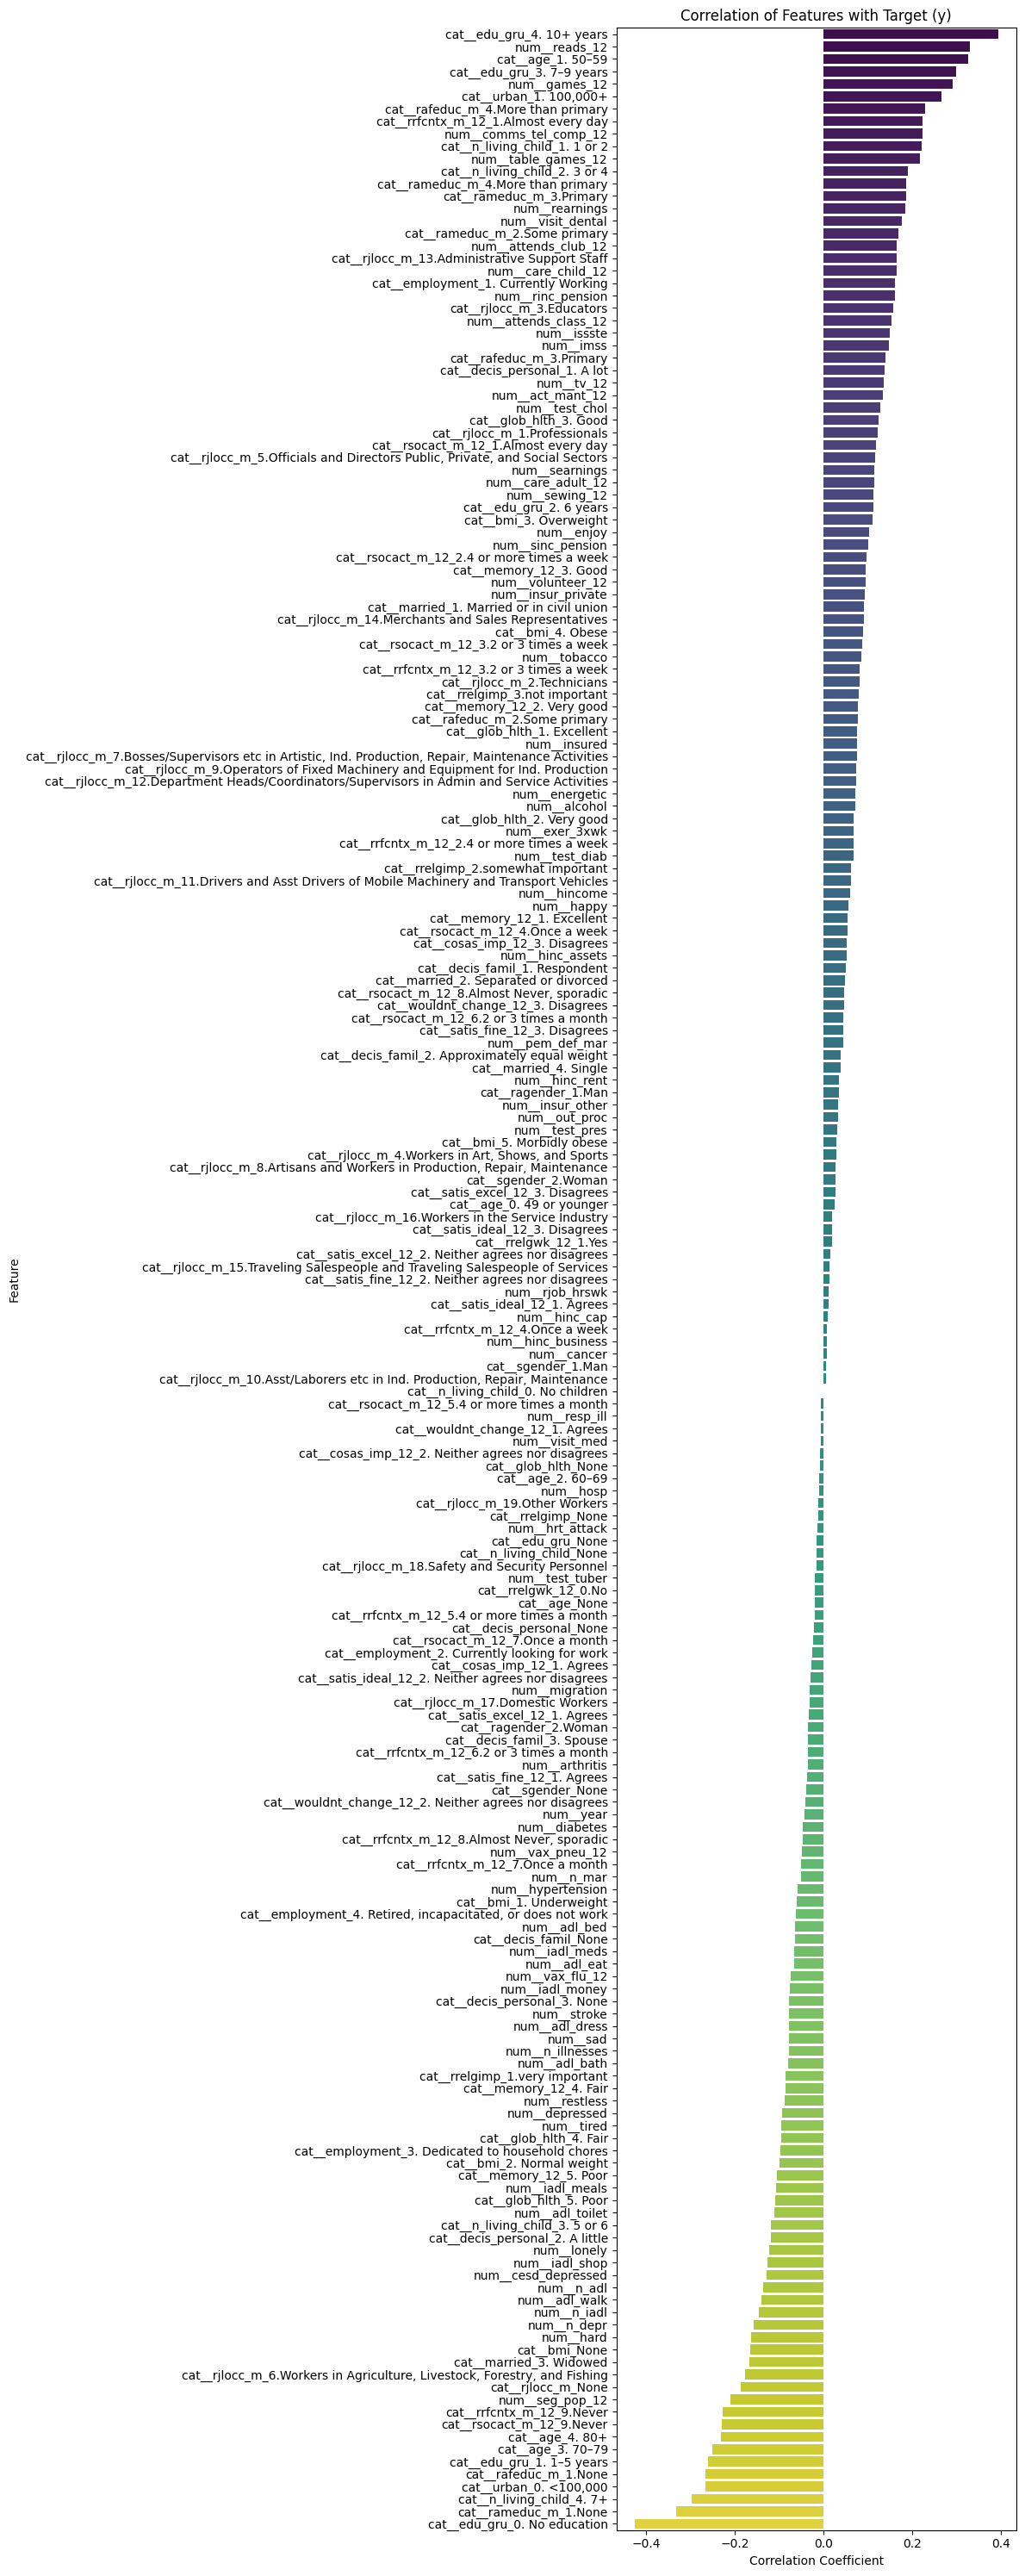

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert processed X back to DataFrame
# Assuming the one-hot encoder expanded categorical features
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Convert y_transformed back to 1D for correlation
y_transformed_flat = y_transformed.ravel()

# Compute correlation
correlations = {}
for col in X_transformed_df.columns:
    correlations[col] = np.corrcoef(X_transformed_df[col], y_transformed_flat)[0, 1]

# Convert to DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Feature", "Correlation"])
correlation_df.sort_values(by="Correlation", ascending=False, inplace=True)

# Print correlation scores
print("Correlation Scores:")
print(correlation_df)

# Plot correlation scores
plt.figure(figsize=(12, 30))
sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")
plt.title("Correlation of Features with Target (y)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Traditional machine learning

e:\project\MLComp\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 3474, number of used features: 194
[LightGBM] [Info] Start training from score 0.464051
                             Model       RMSE
8                    Random Forest  37.574136
16              LightGBM Regressor  37.801623
6   Support Vector Regressor (SVR)  37.877454
12          Hist Gradient Boosting  37.888336
15               XGBoost Regressor  38.796315
9                Gradient Boosting  38.828650
5                   Bayesian Ridge  39.345131
1                            Ridge  39.624071
4                  Huber Regressor  39.872585
0                Linear Regression  40.169515
11                        AdaBoost  43.872346
14                   MLP Regressor  44.6781

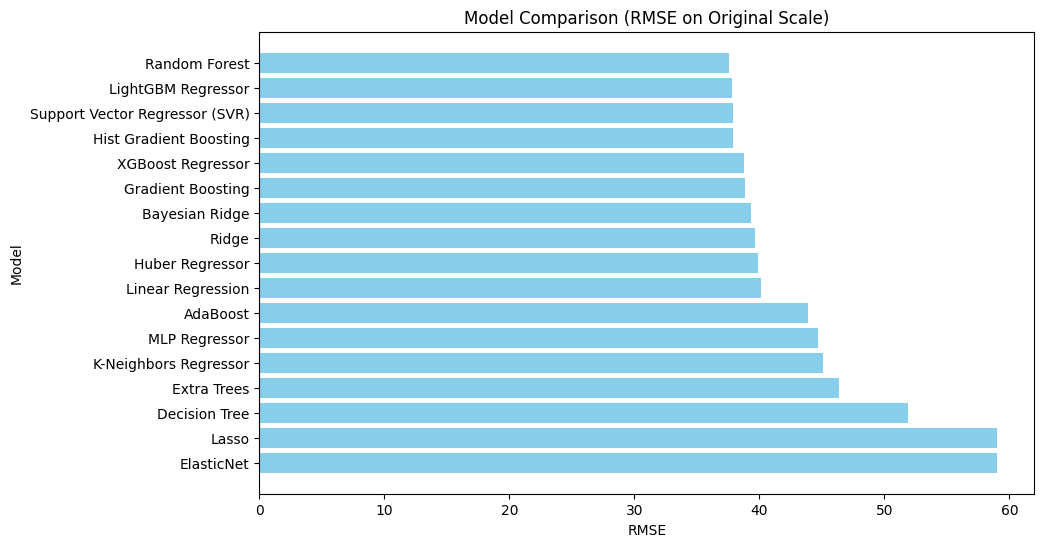

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor(),
    #'CatBoost Regressor': cb.CatBoostRegressor(verbose=0)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


Smote

In [88]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

# Helper: Remove highly correlated features
def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr()
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [
        column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
    ]
    print(f"Removing correlated features: {to_drop}")
    return df.drop(columns=to_drop, axis=1)

# Helper: Feature selection using feature importance
def select_important_features(X, y, model=None):
    if model is None:
        model = RandomForestRegressor(random_state=42, n_jobs=-1)
    model.fit(X, y)
    selector = SelectFromModel(model, prefit=True)
    X_selected = selector.transform(X)
    print(f"Selected {X_selected.shape[1]} features out of {X.shape[1]} total features.")
    return X_selected, selector

# Ensure X is a DataFrame
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    X[col] = X[col].apply(lambda x: str(x) if pd.notna(x) else x)

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess X
X_transformed = preprocessor.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)

# Preprocess y (target)
y_reshaped = y.values.reshape(-1, 1)
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_transformed = y_scaler.fit_transform(y_reshaped)

# Feature selection: Remove highly correlated features
X_transformed_df = remove_highly_correlated_features(X_transformed_df)

# Feature selection: Select important features using a model
X_selected, selector = select_important_features(X_transformed_df, y_transformed.ravel())

# (Optional) Handle imbalance using SMOTE
# For regression, SMOTE may not always be appropriate. If your task needs balanced data, consider alternatives.

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_transformed, test_size=0.2, random_state=42)

# Train a regression model
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

# Rescale y_pred and y_test back to original scale for RMSE
y_test_original = y_scaler.inverse_transform(y_test)
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Removing correlated features: [73, 76, 187, 224]
Selected 29 features out of 221 total features.


e:\project\MLComp\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Root Mean Squared Error (RMSE): 38.6459


[I 2024-11-27 00:27:35,083] A new study created in memory with name: no-name-6a2a4db2-4332-4b13-99ef-bf3577b90295
[I 2024-11-27 00:27:37,501] Trial 0 finished with value: 41.85603960331273 and parameters: {'n_estimators': 129, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 0 with value: 41.85603960331273.
[I 2024-11-27 00:27:41,164] Trial 1 finished with value: 39.44327337852987 and parameters: {'n_estimators': 141, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 1 with value: 39.44327337852987.
[I 2024-11-27 00:27:45,862] Trial 2 finished with value: 37.922057561502555 and parameters: {'n_estimators': 133, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 2 with value: 37.922057561502555.
[I 2024-11-27 00:27:48,031] Trial 3 finished with value: 39.35860912298425 and parameters: {'n_estimators': 81, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 2 with value: 3

Best hyperparameters: {'n_estimators': 162, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best RMSE: 37.40349036159484
    number      value             datetime_start          datetime_complete  \
61      61  37.403490 2024-11-27 00:31:47.218070 2024-11-27 00:31:55.089994   
96      96  37.426069 2024-11-27 00:34:25.367434 2024-11-27 00:34:33.760422   
93      93  37.428491 2024-11-27 00:33:58.232969 2024-11-27 00:34:07.104905   
84      84  37.477328 2024-11-27 00:33:27.126901 2024-11-27 00:33:30.237903   
68      68  37.484910 2024-11-27 00:32:33.073037 2024-11-27 00:32:39.017368   
..     ...        ...                        ...                        ...   
70      70  41.460108 2024-11-27 00:32:44.531367 2024-11-27 00:32:45.969368   
5        5  41.471656 2024-11-27 00:27:51.039794 2024-11-27 00:27:54.147352   
0        0  41.856040 2024-11-27 00:27:35.097639 2024-11-27 00:27:37.501231   
50      50  44.852546 2024-11-27 00:30:32.208882 2024-11-27 00:30:34.0463

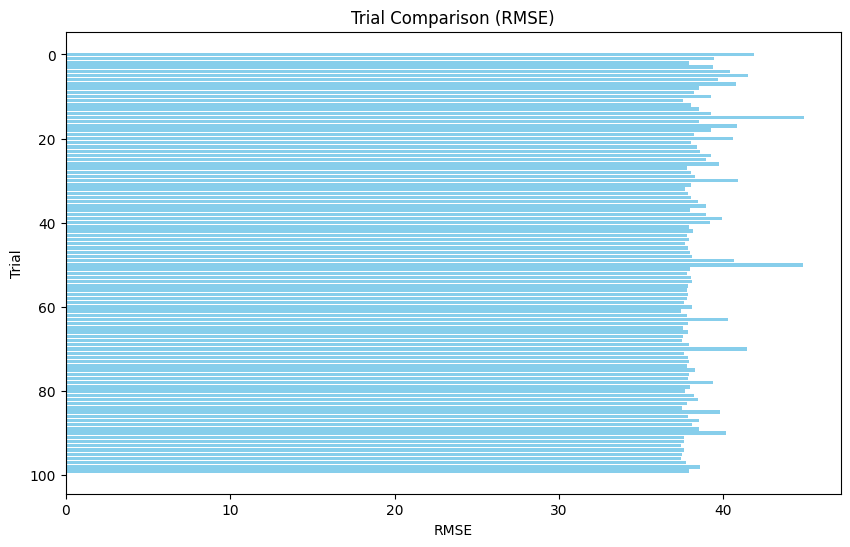

In [64]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the objective function for optimization
def objective(trial):
    # Hyperparameters to tune for RandomForestRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Initialize model with selected hyperparameters
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    
    return rmse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the corresponding RMSE
print(f'Best hyperparameters: {study.best_params}')
print(f'Best RMSE: {study.best_value}')

# You can also access the results of the trials:
trials_df = study.trials_dataframe()
print(trials_df.sort_values(by='value'))

# Plot RMSE comparison for each trial
plt.figure(figsize=(10, 6))
plt.barh(trials_df['number'], trials_df['value'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Trial')
plt.title('Trial Comparison (RMSE)')
plt.gca().invert_yaxis()
plt.show()


Best hyperparameters: {'n_estimators': 162, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best RMSE: 37.40349036159484

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Hyperparameters found by Optuna
best_params = {
    'n_estimators': 162,
    'max_depth': 18,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

# Create the RandomForestRegressor with the best hyperparameters
random_forest_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train.ravel())  # Flatten target for training

# Predict on validation data
y_pred_scaled = random_forest_model.predict(X_val)

# Inverse transform predictions and true values to their original scale
y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate RMSE in original scale
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))

# Display RMSE
print(f'RMSE on validation set: {rmse}')


RMSE on validation set: 37.753320537670575


In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
#X = df.drop(columns=['composite_score'])
# Handle outliers in numerical features
for col in numerical_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

# Combine rare categories
for col in categorical_features:
    counts = X[col].value_counts()
    rare_cats = counts[counts < 10].index
    X[col] = X[col].replace(rare_cats, "Other")

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess X
X_transformed = preprocessor.fit_transform(X)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_transformed = poly.fit_transform(X_transformed)

# Feature selection
selector = SelectFromModel(RandomForestRegressor(), threshold='mean')
X_selected = selector.fit_transform(X_transformed, y)

# Preprocess y (target)
y_scaler = StandardScaler()
y_transformed = y_scaler.fit_transform(y.values.reshape(-1, 1))


In [91]:

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor(),
    #'CatBoost Regressor': cb.CatBoostRegressor(verbose=0)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


e:\project\MLComp\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MemoryError: Unable to allocate 368. MiB for an array with shape (48299022,) and data type float64

# deep learning

In [1]:
import pandas as pd

# Load the data
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# Merge on 'uid', keeping all rows from train_labels
data = pd.merge(train_features, train_labels, on='uid', how='right')

# Set 'uid' as index and sort for alignment
data.set_index('uid', inplace=True)
data.sort_index(inplace=True)
X = data.drop(columns=['composite_score'])
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]

decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}

# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in data.columns and col_12 in data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            data[new_col] = data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            data[new_col] = data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
#print("Data preview after processing:")




In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Make sure X is a DataFrame
# X = pd.DataFrame(X)  # If X is not already a DataFrame, ensure it's one

df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier
y = df['composite_score']
col_to_drop = [
    'a16a_12', 'a21_12', 'a22_12', 'a33b_12',
    'a34_12', #'j11_12',
    # maybe
    'rjob_end', 'rjobend_reason'
]
X.drop(columns=col_to_drop, inplace=True)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    X[col] = X[col].apply(
        lambda x: str(x) if pd.notna(x) else x  # Convert non-NaN values to string, leave NaN as is
    )
# Convert numerical features to float, invalid parsing becomes NaN
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')
# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])



# Define a custom transformer for scaling numerical features
class CustomScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if X is a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            columns = X.columns
        else:
            # In case it's a NumPy array, we don't have column names, so we'll create dummy column names
            columns = [f'feature_{i}' for i in range(X.shape[1])]

        scaler = StandardScaler()
        minmax_scaler = MinMaxScaler()

        X_scaled = X.copy()
        for i, col in enumerate(columns):
            if X[:, i].max() > 1:
                X_scaled[:, i] = scaler.fit_transform(X[:, i].reshape(-1, 1)).flatten()  # Apply StandardScaler
            else:
                X_scaled[:, i] = minmax_scaler.fit_transform(X[:, i].reshape(-1, 1)).flatten()  # Apply MinMaxScaler for others
        return X_scaled

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with the median
    ('custom_scaler', CustomScaler())  # Apply custom scaling
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the custom Min-Max scaling function for y
def custom_min_max_scaler(y, feature_range=(0, 1)):
    min_val = 0
    max_val = 384
    scale = feature_range[1] - feature_range[0]
    scaled_y = ((y - min_val) / (max_val - min_val)) * scale + feature_range[0]
    return scaled_y
def custom_min_max_scaler_inverse(scaled_y, min_val=0, max_val=384, feature_range=(0, 1)):
    scale = feature_range[1] - feature_range[0]
    original_y = ((scaled_y - feature_range[0]) / scale) * (max_val - min_val) + min_val
    return original_y



# Preprocessing for y (target)
# Apply custom Min-Max scaling to y
y_transformed = custom_min_max_scaler(y)

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X)

# Outputs
print("Transformed X (features):", X_transformed)
print("Transformed y (target):", y_transformed)


Transformed X (features): [[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
Transformed y (target): uid
aace    0.455729
aanz    0.536458
aape    0.419271
aape    0.375000
aard    0.270833
          ...   
zzag    0.395833
zzci    0.364583
zzci    0.315104
zzjb    0.083333
zzti    0.382812
Name: composite_score, Length: 4343, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y, test_size=0.4, random_state=42
)

In [22]:
from pytorch_tabnet.tab_model import TabNetRegressor
# Initialize TabNet
tabnet = TabNetRegressor()

# Train TabNet
tabnet.fit(
    X_train, np.asarray(y_train).reshape(-1, 1),
    eval_set=[(X_train, np.asarray(y_train).reshape(-1, 1)), (X_val, np.asarray(y_val).reshape(-1, 1))],
    eval_metric=['rmse'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# Predictions and evaluation
predictions = tabnet.predict(X_val)
print('Validation RMSE:', np.sqrt(mean_squared_error(np.asarray(y_val).reshape(-1, 1), predictions)))

e:\project\MLComp\.venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 27916.63379| val_0_rmse: 165.53118| val_1_rmse: 164.60828|  0:00:01s
epoch 1  | loss: 26369.51797| val_0_rmse: 160.55874| val_1_rmse: 159.63871|  0:00:01s
epoch 2  | loss: 24096.65547| val_0_rmse: 153.13682| val_1_rmse: 152.29412|  0:00:02s
epoch 3  | loss: 21117.94102| val_0_rmse: 140.12932| val_1_rmse: 139.43019|  0:00:03s
epoch 4  | loss: 17005.59131| val_0_rmse: 125.7757| val_1_rmse: 125.29887|  0:00:04s
epoch 5  | loss: 12624.61982| val_0_rmse: 108.78485| val_1_rmse: 108.20543|  0:00:05s
epoch 6  | loss: 8536.17583| val_0_rmse: 89.3215 | val_1_rmse: 88.68681|  0:00:06s
epoch 7  | loss: 5335.91274| val_0_rmse: 73.86806| val_1_rmse: 73.95282|  0:00:07s
epoch 8  | loss: 3556.17463| val_0_rmse: 65.51991| val_1_rmse: 64.23076|  0:00:08s
epoch 9  | loss: 2924.57039| val_0_rmse: 59.05372| val_1_rmse: 58.94114|  0:00:08s
epoch 10 | loss: 2830.047| val_0_rmse: 56.6074 | val_1_rmse: 55.80467|  0:00:09s
epoch 11 | loss: 2709.16042| val_0_rmse: 53.18945| val_1_rmse: 52.2887 |

e:\project\MLComp\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Validation RMSE: 41.143043743844714


In [23]:
# Predictions and evaluation
predictions = tabnet.predict(X_val)
print('Validation RMSE:', np.sqrt(mean_squared_error(np.asarray(y_val).reshape(-1, 1), predictions)))

Validation RMSE: 41.143043743844714


In [137]:
# Train a final model using hyperparameters (use best epoch from previuos cell) and all development data (train+val)
final_model = TabNetRegressor()

# Train TabNet
final_model.fit(
    X, np.asarray(y).reshape(-1, 1),
    eval_set=[(X, np.asarray(y).reshape(-1, 1))],
    max_epochs=45,
    batch_size=256,
    virtual_batch_size=128,
    eval_metric=['rmse'],
)

4343

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import mean_squared_error
import numpy as np

# Define an optimized PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        self.initialize_weights()

    def forward(self, x):
        return self.model(x)

    def initialize_weights(self):
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

# Preprocess data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.4, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = RegressionModel(input_size)

criterion = nn.SmoothL1Loss()  # Huber loss
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training the model
epochs = 500
best_val_loss = float('inf')
early_stop_counter = 0
patience = 30

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    # Adjust learning rate
    scheduler.step(val_loss / len(val_loader))

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break

# Load the best model for evaluation
model.load_state_dict(torch.load("best_model.pth", weights_only=True))

# Evaluate the model on validation set
model.eval()
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Convert lists to numpy arrays
y_val_pred_scaled = np.array(y_val_pred_scaled)
y_val_true = np.array(y_val_true)

# Inverse transform predictions and true values using custom function
y_val_pred_original = custom_min_max_scaler_inverse(y_val_pred_scaled, feature_range=(0, 1))
y_val_original = custom_min_max_scaler_inverse(y_val_true, feature_range=(0, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_10880\3396899880.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_transformed = torch.tensor(y_transformed, dtype=torch.float32)
e:\project\MLComp\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500, Training Loss: 0.2045, Validation Loss: 0.0712
Epoch 2/500, Training Loss: 0.0730, Validation Loss: 0.0561
Epoch 3/500, Training Loss: 0.0488, Validation Loss: 0.0408
Epoch 4/500, Training Loss: 0.0376, Validation Loss: 0.0255
Epoch 5/500, Training Loss: 0.0296, Validation Loss: 0.0235
Epoch 6/500, Training Loss: 0.0242, Validation Loss: 0.0186
Epoch 7/500, Training Loss: 0.0205, Validation Loss: 0.0178
Epoch 8/500, Training Loss: 0.0177, Validation Loss: 0.0208
Epoch 9/500, Training Loss: 0.0154, Validation Loss: 0.0153
Epoch 10/500, Training Loss: 0.0142, Validation Loss: 0.0177
Epoch 11/500, Training Loss: 0.0123, Validation Loss: 0.0144
Epoch 12/500, Training Loss: 0.0110, Validation Loss: 0.0128
Epoch 13/500, Training Loss: 0.0104, Validation Loss: 0.0117
Epoch 14/500, Training Loss: 0.0101, Validation Loss: 0.0111
Epoch 15/500, Training Loss: 0.0087, Validation Loss: 0.0131
Epoch 16/500, Training Loss: 0.0088, Validation Loss: 0.0118
Epoch 17/500, Training Loss: 0.00

submit test 40.1 RMSE

In [19]:
# Load test features and submission format
test_features = pd.read_csv('test_features.csv')
submission_format = pd.read_csv('submission_format.csv')
print(len(test_features), len(submission_format))

# Merge on 'uid', keeping all rows from train_labels
pred_data = pd.merge(test_features, submission_format, on='uid', how='right')
print(len(pred_data))
decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]
# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in pred_data.columns and col_12 in pred_data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            pred_data[new_col] = pred_data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            pred_data[new_col] = pred_data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        pred_data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result


col_to_delete = [
    'a16a_12', 'a21_12', 'a22_12', 'a33b_12',
    'a34_12', 'j11_12',
    # maybe
    'rjob_end', 'rjobend_reason'
]
pred_data.drop(columns=col_to_delete, inplace=True)


# Identify numerical and categorical features
numerical_features = pred_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = pred_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    pred_data[col] = pred_data[col].apply(
        lambda x: str(x) if pd.notna(x) else x  # Convert non-NaN values to string, leave NaN as is
    )
# Convert numerical features to float, invalid parsing becomes NaN
for col in numerical_features:
    pred_data[col] = pd.to_numeric(pred_data[col], errors='coerce')

819 1105
1105


In [20]:
test_features_transformed = preprocessor.transform(pred_data)

ValueError: columns are missing: {'j11_12'}

In [ ]:
# Predict on the aligned test dataset
aligned_test_predictions = final_model.predict()

In [154]:
#deep learning
# Submission
# Preprocess test features
input_size = X_train.shape[1]
model = RegressionModel(input_size)
model.load_state_dict(torch.load("best_model.pth"))
test_features_transformed = preprocessor.transform(pred_data)
test_features_tensor = torch.tensor(test_features_transformed, dtype=torch.float32)

# Predict on test data
model.eval()
test_predictions_scaled = model(test_features_tensor).detach().numpy()
# Define the custom Min-Max scaling function for y
def custom_min_max_scaler(y, feature_range=(0, 1)):
    min_val = 0
    max_val = 384
    scale = feature_range[1] - feature_range[0]
    scaled_y = ((y - min_val) / (max_val - min_val)) * scale + feature_range[0]
    return scaled_y

# Define the custom inverse Min-Max scaling function for y
def custom_min_max_scaler_inverse(scaled_y, min_val=0, max_val=384, feature_range=(0, 1)):
    scale = feature_range[1] - feature_range[0]
    original_y = ((scaled_y - feature_range[0]) / scale) * (max_val - min_val) + min_val
    return original_y

# After scaling the predictions, apply the inverse transformation to get the original values
test_predictions_original = np.rint(custom_min_max_scaler_inverse(test_predictions_scaled)).astype('int64')

# Prepare the submission dataframe
submission_format['composite_score'] = test_predictions_original.flatten()
submission_format.to_csv('submission_7.csv', index=False)
print("Submission file 'submission_7.csv' created successfully!")


Submission file 'submission_7.csv' created successfully!


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_33732\886079061.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


In [120]:
import numpy as np

# Define the custom Min-Max scaling function for y
def custom_min_max_scaler(y, feature_range=(0, 1)):
    min_val = 0
    max_val = 384
    scale = feature_range[1] - feature_range[0]
    scaled_y = ((y - min_val) / (max_val - min_val)) * scale + feature_range[0]
    return scaled_y

# Define the custom inverse Min-Max scaling function for y
def custom_min_max_scaler_inverse(scaled_y, min_val=0, max_val=384, feature_range=(0, 1)):
    scale = feature_range[1] - feature_range[0]
    original_y = ((scaled_y - feature_range[0]) / scale) * (max_val - min_val) + min_val
    return original_y

# Test the custom scaler and its inverse
y = np.array([0, 2, 384])  # Example values within the range [0, 384]
scaled_y = custom_min_max_scaler(y)  # Scale the values
inversed_y = custom_min_max_scaler_inverse(scaled_y)  # Inverse transform

scaled_y, inversed_y  # Show the results


(array([0.        , 0.00520833, 1.        ]), array([  0.,   2., 384.]))

use optuna with deep learning

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Dataset preparation
# Assuming X_transformed (features) and y_transformed (labels) are already preprocessed tensors
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Optuna objective function
def objective(trial):
    # Hyperparameters
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    dropout1 = trial.suggest_uniform("dropout1", 0.1, 0.5)
    dropout2 = trial.suggest_uniform("dropout2", 0.1, 0.5)
    num_neurons1 = trial.suggest_int("num_neurons1", 64, 256, step=32)
    num_neurons2 = trial.suggest_int("num_neurons2", 32, 128, step=16)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # Define the model
    class TrialRegressionModel(nn.Module):
        def __init__(self, input_size):
            super(TrialRegressionModel, self).__init__()
            self.model = nn.Sequential(
                nn.Linear(input_size, num_neurons1),
                nn.ReLU(),
                nn.BatchNorm1d(num_neurons1),
                nn.Dropout(dropout1),
                nn.Linear(num_neurons1, num_neurons2),
                nn.ReLU(),
                nn.BatchNorm1d(num_neurons2),
                nn.Dropout(dropout2),
                nn.Linear(num_neurons2, 1)
            )

        def forward(self, x):
            return self.model(x)

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_transformed, y_transformed, test_size=0.2, random_state=42
    )

    # Prepare DataLoaders
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss, optimizer
    input_size = X_train.shape[1]
    model = TrialRegressionModel(input_size)
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    # Training loop
    epochs = 50
    best_val_loss = float("inf")

    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_loss = 0.0
        val_outputs = []
        val_targets = []
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X).squeeze()
                val_loss += criterion(outputs, batch_y.squeeze()).item()
                val_outputs.extend(outputs.numpy())
                val_targets.extend(batch_y.numpy())

        val_loss /= len(val_loader)
        val_rmse = np.sqrt(mean_squared_error(val_targets, val_outputs))

        # Log RMSE and save the best model
        print(f"Epoch {epoch + 1}/{epochs}, Validation RMSE: {val_rmse:.4f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pth")

    return best_val_loss

# Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best hyperparameters:", study.best_params)

# Reload the best model for evaluation and predictions
best_params = study.best_params
input_size = X_transformed.shape[1]
best_model = TrialRegressionModel(input_size)
best_model.load_state_dict(torch.load("best_model.pth"))

# Evaluate on validation data and calculate RMSE
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=best_params["batch_size"], shuffle=False)

y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = best_model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Inverse transform predictions and true values
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")
'''
Epoch 50/50, Validation RMSE: 0.1175
Best hyperparameters: {'learning_rate': 0.009382722522357518, 'dropout1': 0.4952925393008022, 'dropout2': 0.2746640785462811, 'num_neurons1': 128, 'num_neurons2': 80, 'batch_size': 64}
'''


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define an optimized PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        self.initialize_weights()

    def forward(self, x):
        return self.model(x)

    def initialize_weights(self):
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

# Preprocess data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = RegressionModel(input_size)

criterion = nn.SmoothL1Loss()  # Huber loss
optimizer = optim.AdamW(model.parameters(), lr=0.009382722522357518)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training the model
epochs = 100
best_val_loss = float('inf')
early_stop_counter = 0
patience = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    # Adjust learning rate
    scheduler.step(val_loss / len(val_loader))

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break

# Load the best model for evaluation
model.load_state_dict(torch.load("best_model.pth"))

# Evaluate the model on validation set
model.eval()
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Inverse transform predictions and true values
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_33732\1927512654.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_33732\1927512654.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_transformed = torch.tensor(y_transformed, dtype=torch.float32)
e:\project\MLComp\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.0589, Validation Loss: 0.0124
Epoch 2/100, Training Loss: 0.0125, Validation Loss: 0.0105
Epoch 3/100, Training Loss: 0.0099, Validation Loss: 0.0103
Epoch 4/100, Training Loss: 0.0090, Validation Loss: 0.0082
Epoch 5/100, Training Loss: 0.0088, Validation Loss: 0.0084
Epoch 6/100, Training Loss: 0.0080, Validation Loss: 0.0082
Epoch 7/100, Training Loss: 0.0078, Validation Loss: 0.0073
Epoch 8/100, Training Loss: 0.0075, Validation Loss: 0.0078
Epoch 9/100, Training Loss: 0.0075, Validation Loss: 0.0076
Epoch 10/100, Training Loss: 0.0072, Validation Loss: 0.0077
Epoch 11/100, Training Loss: 0.0070, Validation Loss: 0.0075
Epoch 12/100, Training Loss: 0.0068, Validation Loss: 0.0077
Epoch 13/100, Training Loss: 0.0067, Validation Loss: 0.0076
Epoch 14/100, Training Loss: 0.0062, Validation Loss: 0.0074
Epoch 15/100, Training Loss: 0.0060, Validation Loss: 0.0077
Epoch 16/100, Training Loss: 0.0058, Validation Loss: 0.0073
Epoch 17/100, Training Loss: 0.00

C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_33732\1927512654.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


# automl tpot

                                                                            
Generation 1 - Current best internal CV score: -0.014962489745252616
                                                                            
Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01), bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)
Best pipeline found by TPOT: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75,
                                                          random_state=42,
                                                          tol=0.01))),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.4, min_samples_leaf=16,
                                       min_samples_split=14,
                                       random_state=42))])
RMSE on validation set: 38.82391464968027


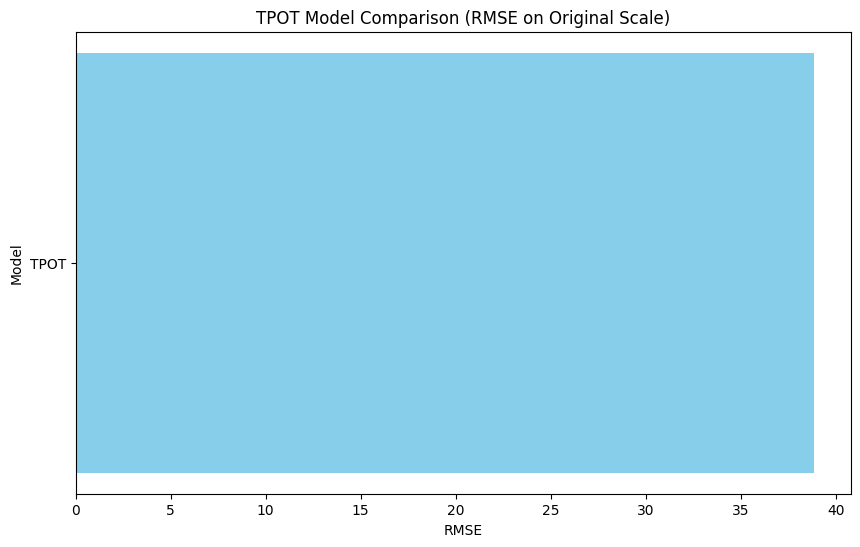

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing code as you've already provided (X_transformed and y_transformed)
# Assuming `X_transformed` and `y_transformed` are already available from the preprocessing steps

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Initialize the TPOT regressor
tpot = TPOTRegressor( generations=1,  # Number of generations for the optimization process
                      population_size=20,  # Number of pipelines to evaluate at each generation
                      random_state=42,  # Ensure reproducibility
                      verbosity=2,  # Print optimization process details
                      n_jobs=-1,
                      scoring='neg_mean_squared_error')  # Use all available CPUs

# Fit TPOT on the training data
tpot.fit(X_train, y_train.ravel())

# Predict on validation data
y_pred_scaled = tpot.predict(X_val)

# Inverse transform the predictions and true values to their original scale
y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate RMSE in the original scale
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))

# Output the results
print(f"Best pipeline found by TPOT: {tpot.fitted_pipeline_}")
print(f"RMSE on validation set: {rmse}")

# Plot RMSE comparison (you can add more models later if you want to compare)
plt.figure(figsize=(10, 6))
plt.barh(['TPOT'], [rmse], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('TPOT Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()

# Optionally, export the best pipeline found by TPOT to a Python file
tpot.export('best_model_pipeline.py')


In [ ]:
!pip install numpy